In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

#quit cientific notation
pd.options.display.float_format = '{:.2f}'.format 

## Contexto 
- (0) Edad
- (1) Gastos mensuales en Medicina
- (2) Gastos mensuales en Educación
- (3) Gastos mensuales en Maní

In [2]:
datos = {
         'edad': [35,50,22,45,18,75,55,20,23,49],
         'medicina': [200,1500,150,250,0,2500,1400,50,0,600],
         'educacion': [1200,0,7500,2200,8300,0,0,4900,5100,800],
         'mani': [10,15,0,10,20,10,20,10,15,0] 
        }

In [3]:
datos = pd.DataFrame(datos)

In [4]:
datos

,edad,medicina,educacion,mani
0,35,200,1200,10
1,50,1500,0,15
2,22,150,7500,0
3,45,250,2200,10
4,18,0,8300,20
5,75,2500,0,10
6,55,1400,0,20
7,20,50,4900,10
8,23,0,5100,15
9,49,600,800,0


In [17]:
datos.aggregate(['mean','var','std'])

,edad,medicina,educacion,mani
mean,39.20,665.00,3000.00,11.00
var,352.40,725027.78,10231111.11,48.89
std,18.77,851.49,3198.61,6.99


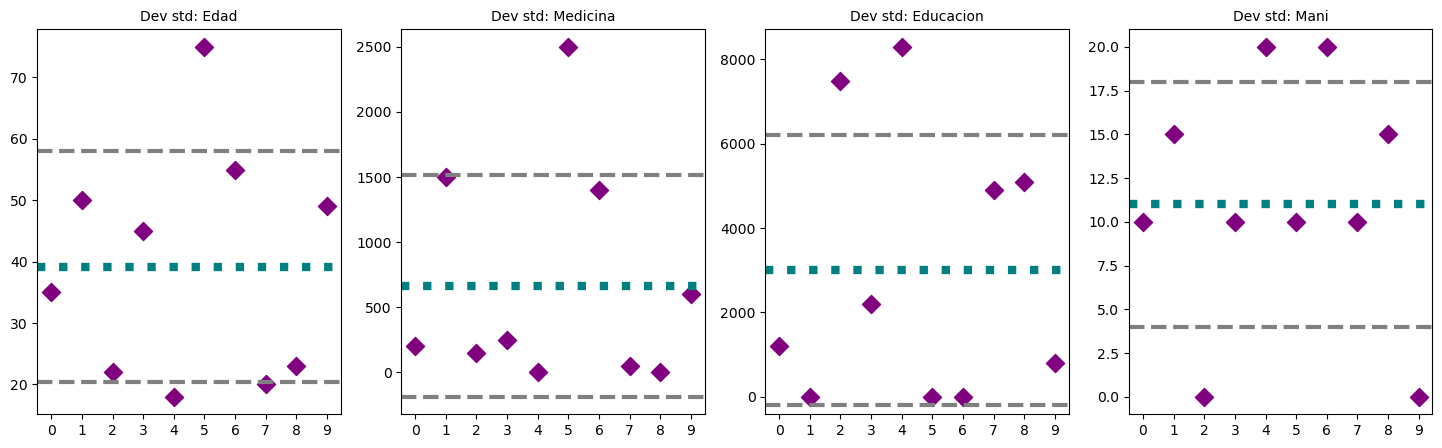

In [13]:
import matplotlib.pyplot as plt

def subgrafica_std(datos, columna, fig, posicion):
    ax = fig.add_subplot(1, 4, posicion)
    #fig= plt.figure()
    

    media = datos[columna].mean()
    std = datos[columna].std()

    # GRAPH DATA
    ax.scatter(x= range(len(datos[columna])), y= datos[columna],
              marker='D', s=85, color='purple')

    #graphs mean and standar deviation
    ax.axhline(y= media + std, color='gray', linestyle='--', linewidth=3)
    ax.axhline(y= media, color='teal', linestyle=':', linewidth=6)
    ax.axhline(y= media - std, color='gray', linestyle='--', linewidth=3)

    #setting graphs
    ax.set_title('Dev std: ' + columna.capitalize(), fontsize=10)
    ax.set_xticks(range(len(datos[columna])))
    ax.get_xaxis().set_visible(True)

#setting size
fig = plt.figure(figsize=(18,5))

subgrafica_std(datos, 'edad', fig, 1)
subgrafica_std(datos, 'medicina', fig, 2)
subgrafica_std(datos, 'educacion', fig, 3)
subgrafica_std(datos, 'mani', fig, 4)

plt.show()

## Matriz de covarianza

In [34]:
print(datos.var())

print('\n Matriz de covarianza')
datos.cov()

edad             352.40
medicina      725027.78
educacion   10231111.11
mani              48.89
dtype: float64

 Matriz de covarianza


,edad,medicina,educacion,mani
edad,352.40,14530.00,-51788.89,-0.78
medicina,14530.00,725027.78,-1923333.33,816.67
educacion,-51788.89,-1923333.33,10231111.11,-500.00
mani,-0.78,816.67,-500.00,48.89


             edad  medicina
edad       352.40  14530.00
medicina 14530.00 725027.78 

               edad   educacion
edad         352.40   -51788.89
educacion -51788.89 10231111.11 

       edad  mani
edad 352.40 -0.78
mani  -0.78 48.89 



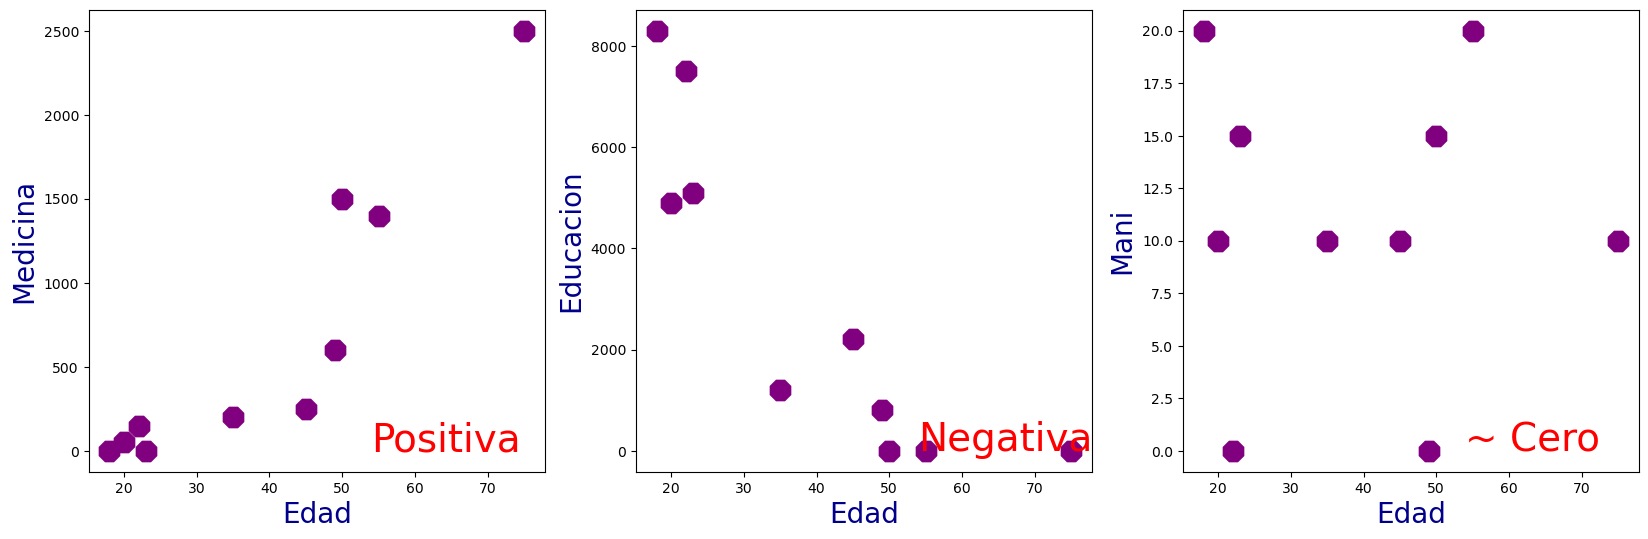





             medicina   educacion
medicina    725027.78 -1923333.33
educacion -1923333.33 10231111.11 

          medicina   mani
medicina 725027.78 816.67
mani        816.67  48.89 

            educacion    mani
educacion 10231111.11 -500.00
mani          -500.00   48.89 



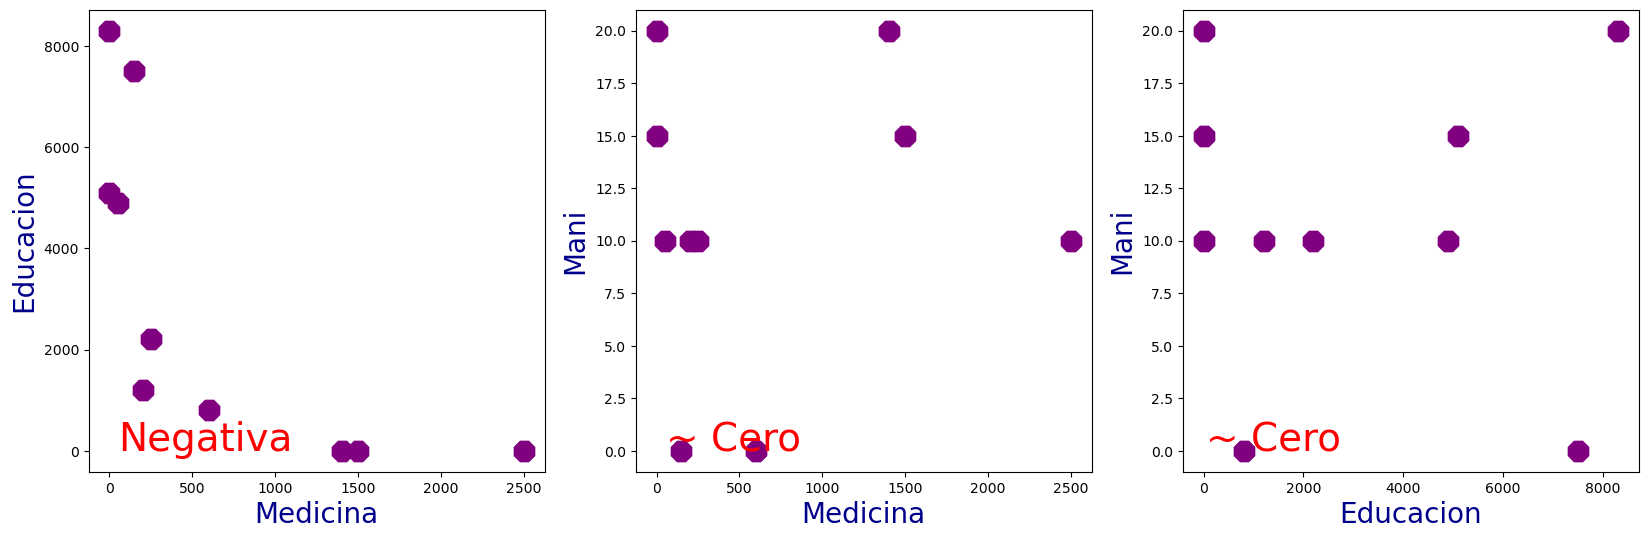

In [35]:
def subgrafica_dispersion(datos, col_a, col_b, fig, posicion, texto): 
    ax = fig.add_subplot(1, 3, posicion) 
    
    ax.scatter(datos[col_a], datos[col_b], marker="8", s=250, color="purple")
    
    ax.set_xlabel(col_a.capitalize(), fontsize=20, color="darkblue")
    ax.set_ylabel(col_b.capitalize(), fontsize=20, color="darkblue")
    ax.text(54, 0, texto, fontsize=28, color="red")
    
## fuera de la funcion
# Impresión de matrices de covarianza

print(datos[["edad", "medicina"]].cov(), "\n")
print(datos[["edad", "educacion"]].cov(), "\n")
print(datos[["edad", "mani"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))

# uso de la funcion
subgrafica_dispersion(datos, "edad", "medicina", fig, 1, "Positiva")     
subgrafica_dispersion(datos, "edad", "educacion", fig, 2, "Negativa")     
subgrafica_dispersion(datos, "edad", "mani", fig, 3, "~ Cero")     
plt.show()


# Impresión de matrices de covarianza

print("\n"*3)
print(datos[["medicina", "educacion"]].cov(), "\n")
print(datos[["medicina", "mani"]].cov(), "\n")
print(datos[["educacion", "mani"]].cov(), "\n")

# Gráficas

fig = plt.figure(figsize=(20, 6))

subgrafica_dispersion(datos, "medicina", "educacion", fig, 1, "Negativa")     
subgrafica_dispersion(datos, "medicina", "mani", fig, 2, "~ Cero")     
subgrafica_dispersion(datos, "educacion", "mani", fig, 3, "~ Cero") 
plt.show()